# Exploratory Data Analysis (EDA) for Instacart

Instacart is a grocery delivery platform where customers can place a grocery order and have it delivered to them, similar to how Uber Eats and Door Dash work. This particular dataset was publicly released by Instacart in 2017 for a Kaggle competition. Although the original dataset is no longer available on the Instacart website, these CSV files contain a modified version of that data. Missing and duplicate values have been introduced to the data for the purpose of this exercise.

## Objective

Clean up the data and prepare a report that gives insight into the shopping habits of Instacart customers. 

In [97]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [98]:
# Create function to load csv files either from my local directory or from the server directory
def load_data(file_name):
    try:
        data = pd.read_csv(
            f'data/{file_name}', sep=';')
    except:
        data = pd.read_csv(f'/datasets/{file_name}', sep=';')
            
    return data

In [99]:
# Load instacart_orders.csv
orders_df = load_data('instacart_orders.csv')

# Load products.csv
products_df = load_data('products.csv')

# Load order_products.csv
order_products_df = load_data('order_products.csv')

# Load aisles.csv
aisles_df = load_data('aisles.csv')

# Load departments.csv
departments_df = load_data('departments.csv')

## Find and remove duplicate values

### `orders` data frame

In [100]:
# Check for duplicated orders
print(
    f'there are {orders_df.duplicated().sum()} duplicated rows in the orders dataframe')
# show the original and duplicated rows sorted by order_id for easy comparison
display(orders_df[orders_df.duplicated(keep=False)].sort_values('order_id'))

there are 15 duplicated rows in the orders dataframe


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
354993,391768,57671,19,3,2,10.0
371905,391768,57671,19,3,2,10.0
119251,408114,68324,4,3,2,18.0
321100,408114,68324,4,3,2,18.0
394347,467134,63189,21,3,2,2.0
250626,467134,63189,21,3,2,2.0
99462,794638,50898,24,3,2,2.0
145574,794638,50898,24,3,2,2.0
311713,1021560,53767,3,3,2,9.0
242618,1021560,53767,3,3,2,9.0


In [101]:
display(orders_df)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478962,3210681,5617,5,1,14,7.0
478963,3270802,112087,2,3,13,6.0
478964,885349,82944,16,2,11,6.0
478965,216274,4391,3,3,8,8.0


Each row should correspond to one order on the Instacart app, meaning no duplicate order IDs. The orders are duplicated across entire row, so I am sure these duplicates should be dropped from the table. 

In [102]:
# Remove duplicate orders
orders_df = orders_df.drop_duplicates().reset_index(drop=True)

In [103]:
# Double check for duplicate rows
print(
    f'there are {orders_df.duplicated().sum()} duplicated rows in the orders dataframe')

there are 0 duplicated rows in the orders dataframe


In [104]:
# Double check for duplicate order IDs only
print(
    f'there are {orders_df.order_id.duplicated().sum()} duplicated order IDs')

there are 0 duplicated order IDs


### `products` data frame

In [105]:
# Check for fully duplicate rows
print(
    f'There are {products_df.duplicated().sum()} duplicated rows in the products dataframe')

There are 0 duplicated rows in the products dataframe


In [106]:
# Check for just duplicate product IDs
print(
    f'There are {products_df.product_id.duplicated().sum()} duplicated product IDs')

There are 0 duplicated product IDs


In [107]:
# Check for just duplicate product names

# Strip and lower case product names
products_df['product_name'] = products_df['product_name'].str.strip().str.lower()

# Check for duplicate product names
print(
    f'There are {products_df["product_name"].duplicated().sum()} duplicated product names in the products dataframe')

There are 1361 duplicated product names in the products dataframe


In [108]:
# Check for duplicate product names that aren't missing
print(
    f"There are {products_df['product_name'].dropna().duplicated().sum()} duplicated product names in the products dataframe (excluding missing values)")

There are 104 duplicated product names in the products dataframe (excluding missing values)


There is more than 1 product ID per product name for these duplicates. I think this is intentional, though. Perhaps they are occurrences of the same product name sold in different quantities, hence why they have different product IDs. We will consider these unique products unless otherwise directed.

### `departments` data frame

In [109]:
departments_df.info()
print()
print(f"There are {departments_df['department_id'].duplicated().sum()} duplicated department IDs and {departments_df['department'].duplicated().sum()} duplicated department names")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes

There are 0 duplicated department IDs and 0 duplicated department names


Everything looks good here.

### `aisles` data frame

In [110]:
aisles_df.info()
print()
print(f"There are {aisles_df['aisle_id'].duplicated().sum()} duplicated aisle IDs and {aisles_df['aisle'].duplicated().sum()} duplicated aisle names")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB

There are 0 duplicated aisle IDs and 0 duplicated aisle names


Also looking good here.

### `order_products` data frame

In [111]:
# Check for fullly duplicate rows
print(
    f"There are {order_products_df.duplicated().sum()} duplicated rows in the order_products dataframe")

There are 0 duplicated rows in the order_products dataframe


In [112]:
# Double check for any other tricky duplicates

# Display df sorted by order_id and add_to_cart_order
display(order_products_df.sort_values(
    ['order_id', 'add_to_cart_order']).head(20))

,order_id,product_id,add_to_cart_order,reordered
311805,4,46842,1.0,0
2834230,4,26434,2.0,1
1295279,4,39758,3.0,1
1169276,4,27761,4.0,1
1420535,4,10054,5.0,1
3977678,4,21351,6.0,1
1172585,4,22598,7.0,1
2043091,4,34862,8.0,1
4107072,4,40285,9.0,1
2507695,4,17616,10.0,1


In [113]:
# Get count of rows that have the same order_id and product_id
print(
    f"there are {order_products_df.duplicated(subset=['order_id', 'product_id']).sum()} rows that have the same order_id and product_id\nThere should be 0")

# Get count of rows that have the same order_id and add_to_cart_order
print(
    f"There are {order_products_df.duplicated(subset=['order_id', 'add_to_cart_order']).sum()} rows that have the same order_id and add_to_cart_order\nThere should be 0")

there are 0 rows that have the same order_id and product_id
There should be 0
There are 766 rows that have the same order_id and add_to_cart_order
There should be 0


In [114]:
# Display first ten rows where order_id and add_to_cart_order are the same
display(order_products_df[order_products_df.duplicated(
    subset=['order_id', 'add_to_cart_order'], keep=False)].head(10))

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
34183,844733,32717,NaN,0
57981,61355,5322,NaN,0
58228,936852,31373,NaN,1
62655,264710,40281,NaN,0
64336,1717990,39408,NaN,0


In [115]:
# Display that same subset with NaN dropped
display(order_products_df[order_products_df.duplicated(
    subset=['order_id', 'add_to_cart_order'], keep=False)].dropna())

,order_id,product_id,add_to_cart_order,reordered


The only duplicates to worry about in this DataFrame are in the add to cart order column for NaN values. I will replace these values shortly.

## Find and remove missing values


### `products` data frame

In [116]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [117]:
# There are missing product names. Let's take a look at them
missing_prod_names = products_df[products_df['product_name'].isna()]
display(missing_prod_names)

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


In [118]:
# At first glance it looks like all the missing product names have the same aisle id and department id. Let's check that
missing_prod_aisles = missing_prod_names['aisle_id'].unique()
missing_prod_departments = missing_prod_names['department_id'].unique()
print(
    f"The missing product names have the following unique aisle ids: {missing_prod_aisles}\nThe missing product names have the following unique department ids: {missing_prod_departments}")

The missing product names have the following unique aisle ids: [100]
The missing product names have the following unique department ids: [21]


In [119]:
# Get info on aisle id 100 and department id 21

# Display the aisle with aisle ID 100
display(aisles_df[aisles_df['aisle_id'] == 100])

# Display the department with department ID 21
display(departments_df[departments_df['department_id'] == 21])

,aisle_id,aisle
99,100,missing


,department_id,department
20,21,missing


Looks like we have some missing information here. Without detailed information on the aisle or department, the best I can do is categorize the missing product names in the products df as "Unknown".

In [120]:
# Fill missing product names with 'Unknown'
products_df['product_name'] = products_df['product_name'].fillna('Unknown')

### `orders` data frame

In [121]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478952 entries, 0 to 478951
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  450135 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [122]:
# Are there any missing values where it's not a customer's first order?
display(orders_df[orders_df['days_since_prior_order'].isna()
        & (orders_df['order_number'] > 1)])

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


The only missing values in this table are in the 'days_since-prior_order' column, and only when it is the customer's first order. This makes sense, so we will keep these as NaN.

### `order_products` data frame

In [123]:
order_products_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [124]:
# What are the min and max values in the add_to_cart_order column?
# atco = add_to_cart_order
atco_min = order_products_df['add_to_cart_order'].min()
atco_max = order_products_df['add_to_cart_order'].max()

print(
    f'The minimum value in the add_to_cart_order column is {atco_min} and the maximum value is {atco_max}')

The minimum value in the add_to_cart_order column is 1.0 and the maximum value is 64.0


In [125]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
order_ids_missing_atco = order_products_df[order_products_df['add_to_cart_order'].isna(
)]['order_id']

In [126]:
# Do all orders with missing values have more than 64 products?

# Filter order_products_df to only include order IDs in order_ids_missing_atco
order_products_df_missing_atco = order_products_df[order_products_df['order_id'].isin(
    order_ids_missing_atco)]

# Sort the order_products_df by order_id and add_to_cart_order
order_products_df_missing_atco = order_products_df_missing_atco.sort_values(
    ['order_id', 'add_to_cart_order'])

# Group by order_id and count the number of products in each order
order_products_df_missing_atco = order_products_df_missing_atco.groupby(
    'order_id').size()

display(order_products_df_missing_atco)

orders_with_missing_atco_with_more_than_64_prod_cnt = len(
    order_products_df_missing_atco[order_products_df_missing_atco < 64])

print(f'There are {orders_with_missing_atco_with_more_than_64_prod_cnt} orders with missing values in add_to_cart_order that have less than 64 products')

order_id
9310        65
61355      127
102236      95
129627      69
165801      70
          ... 
2999801     70
3125735     86
3308010    115
3347453     71
3383594     69
Length: 70, dtype: int64

There are 0 orders with missing values in add_to_cart_order that have less than 64 products


It looks like the app correctly records 'the add to cart order' up to the 64th product added to order. Any subsequent order is given the NaN value. Developers may want to look into patching this bug.<br>

I could write an algorithm to sort the df by order ID, by atco and fill in the missing values by incrementing up from the previous atco value. This would give me an accurate count of products ordered per order ID, but would not necessarily reflect the true order in which the products were added to the cart. For simplicity's sake, I will replace the missing values with the value '999'. I can always get the counts per order ID by using the count method.

In [127]:
# Fill missing values with 999
order_products_df['add_to_cart_order'] = order_products_df['add_to_cart_order'].fillna(
    999).astype(int)

print('\nAfter transformation:\n')
order_products_df.info(show_counts=True)
print()
print(
    f'The max value in "add to cart order" column is {order_products_df["add_to_cart_order"].max()}')


After transformation:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int64
 3   reordered          4545007 non-null  int64
dtypes: int64(4)
memory usage: 138.7 MB

The max value in "add to cart order" column is 999


## Question A1:  
Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)


In [128]:
# Order Hour of Day unique values sorted ascending
print(np.sort(orders_df['order_hour_of_day'].unique()))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [129]:
# Order day of week unique values sorted ascending
print(np.sort(orders_df['order_dow'].unique()))

[0 1 2 3 4 5 6]


**Answer:**  
The values for 'order hour of the day' and 'order dow' are sensible and inline with expectations.

## Question A2:  
What time of day do people shop for groceries?

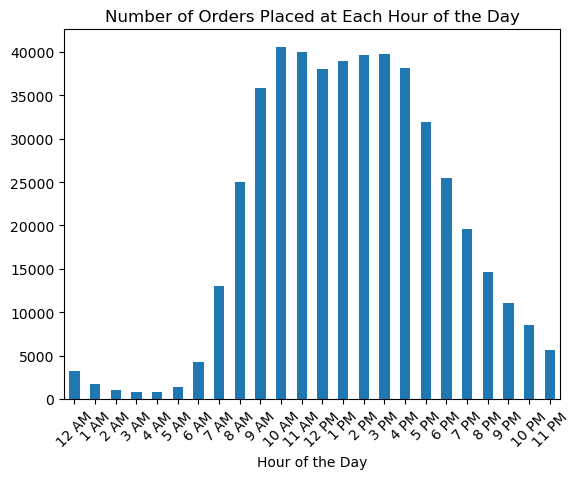

The top five busiest hours of the day in descending order are: [10 11 15 14 13]


In [130]:
# Plot the number of orders placed at each hour of the day
orders_df['order_hour_of_day'].value_counts().sort_index().plot(
    kind='bar', title='Number of Orders Placed at Each Hour of the Day',                                                                        xlabel='Hour of the Day', rot=45)

# Change x-tick labels to 12-hour format starting at 12 AM
plt.xticks(ticks=np.arange(0, 24, 1), labels=[
    f'{i % 12 or 12} AM' if i < 12 else f'{i % 12 or 12} PM' for i in range(0, 24)])

plt.show()


# Get the top five busiest hours of the day
top_five_busiest_hours = orders_df['order_hour_of_day'].value_counts(
).sort_values(ascending=False).head(5)

print(
    f'The top five busiest hours of the day in descending order are: {top_five_busiest_hours.index.values}')

In [131]:
# Calculate the share of orders placed between hour 8 and 18 (8am to 6pm)(inclusive)
orders_share_8_to_18 = orders_df['order_hour_of_day'].between(
    8, 18).sum() / orders_df['order_hour_of_day'].count()
print(
    f'The share of orders placed between 8am and 6pm is {orders_share_8_to_18:.2%}')

The share of orders placed between 8am and 6pm is 82.17%


**Answer**:  
The busiest hour of the day is 10 AM.  
The top five busiest hours of the day are 10 AM, 11 AM, 3 PM, 4 PM, and 1 PM (respectively).  
82.17% of all orders are placed between 8AM and 6PM.

## Question A3:  
What day of the week do people shop for groceries?

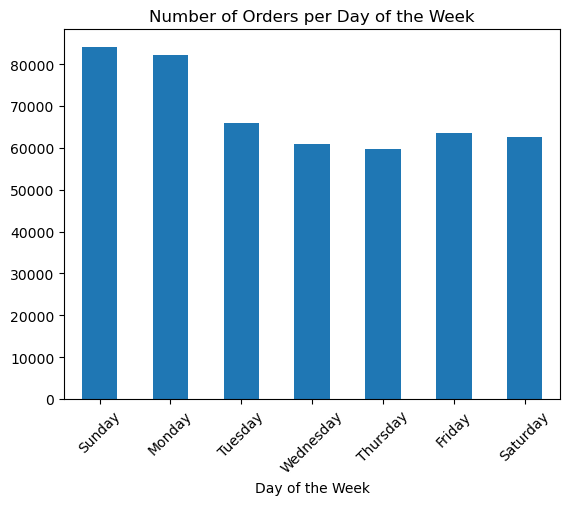

In [132]:
# Plot the number of orders placed on each day of the week
fig_orders_by_dow = orders_df['order_dow'].value_counts().sort_index().plot(
    kind='bar', title='Number of Orders per Day of the Week',
    xlabel='Day of the Week'
)
# Set xtick labels to the actual day names (still assuming dow 0 is Sunday)
fig_orders_by_dow.set_xticklabels(
    ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], rotation=45)

plt.show()

**Answer:**  
Assuming Sunday = 0 in Day of Week, Sunday is the busiest day for grocery shopping, with Monday as a close second.

## Question A4:  
How long do people wait until placing another order?

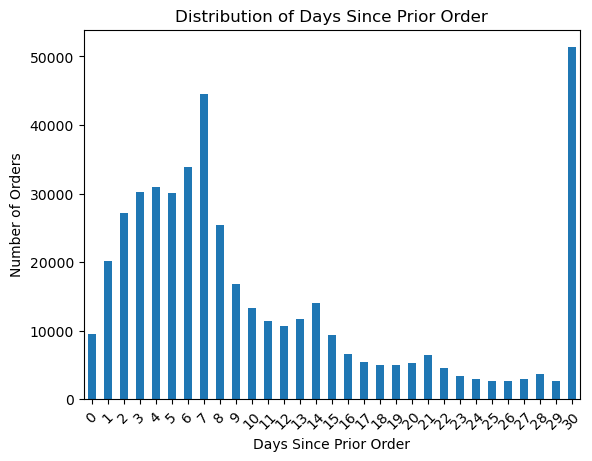

Mode        30.0
count    450135.000000
mean         11.101814
std           9.190004
min           0.000000
25%           4.000000
50%           7.000000
75%          15.000000
max          30.000000
Name: days_since_prior_order, dtype: float64


In [133]:
# Get a sense of the distribution of days since prior order
fig_days_since_prior_order = orders_df['days_since_prior_order'].value_counts().sort_index().plot(
    kind='bar', title='Distribution of Days Since Prior Order', xlabel='Days Since Prior Order', rot=45, ylabel='Number of Orders')

# Set xtick labels to display as integers
fig_days_since_prior_order.set_xticklabels(
    orders_df['days_since_prior_order'].value_counts().sort_index().index.astype(int))

plt.show()


# The distribution of days since prior order is right-skewed, with a peak at 7 days. This suggests that many customers place orders once a week. There is an even bigger peak at 30 days, which suggests that many customers place orders once a month, but 30 is also the maximum value in the column, so it's possible any value greater than 30 is represented as 30.

# Look at description of days since prior order, including mode
mode = orders_df['days_since_prior_order'].mode()[0]
print(f'Mode        {mode}')
print(orders_df['days_since_prior_order'].describe())

While the mean days since prior order is 11, and the most occurring days since prior order is 30, this is skewed likely due to a data collection issue (days since prior order above 30 seem to be all recorded as 30).

**Answer:**  
Looking at the graph, we can see the next most occurring number of days since prior order is 7. Additionally 7 days is the median value for the dataset.<br>
Generally speaking, customers order about once every 7 days.


## Question B1:  
Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays?

Text(0.5, 0.98, 'Comparison of Order Hour Distributions on Wednesdays and Saturdays')

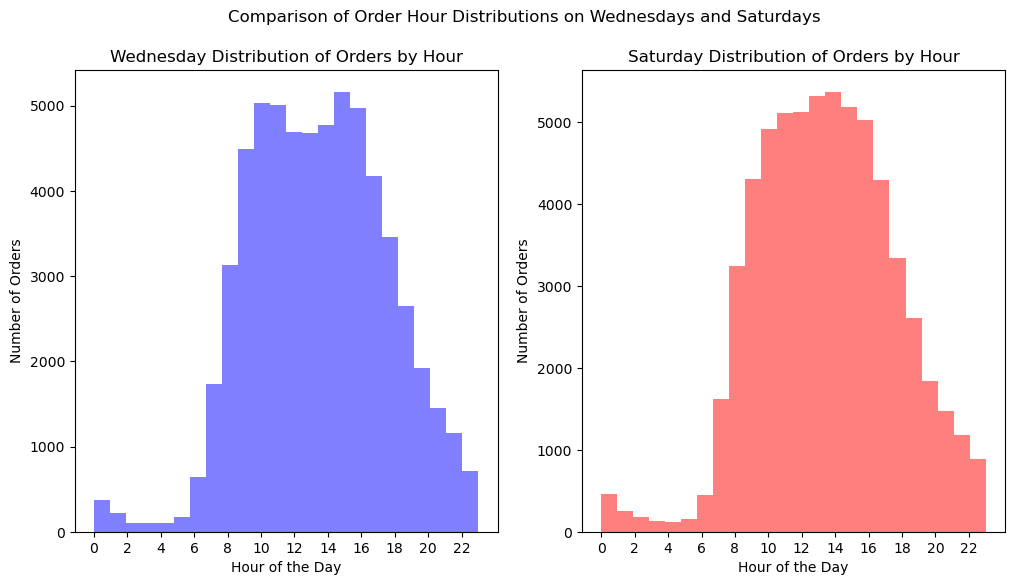

In [134]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Define the bins for the histograms
bins = 24
# Plot Wednesday distribution of orders by hour as a histogram with variable bins
orders_df[orders_df['order_dow'] == 3]['order_hour_of_day'].plot(
    kind='hist', bins=bins, title='Wednesday Distribution of Orders by Hour', xlabel='Hour of the Day', xticks=range(0, 24, 2),
    ylabel='Number of Orders', color='blue',
    alpha=0.5, ax=axes[0])

# Plot Saturday distribution of orders by hour as a histogram with variable bins
orders_df[orders_df['order_dow'] == 6]['order_hour_of_day'].plot(
    kind='hist', bins=bins, title='Saturday Distribution of Orders by Hour', xlabel='Hour of the Day', xticks=range(0, 24, 2),
    ylabel='Number of Orders', color='red',
    alpha=0.5, ax=axes[1])

# Set the title for the entire figure
fig.suptitle(
    'Comparison of Order Hour Distributions on Wednesdays and Saturdays')  # semicolon to suppress output

**Answer:**  
There is one major difference between the Orders by Hour Distribution for Wednesday vs Saturday: On Wednesdays there is a slight dip in orders between 11 AM and 3 PM. Where as, on Saturday, that same time frame is actually the busiest part of the day. Beyond that, the graph shapes are generally the same with Wednesday's orders trailing off slightly faster in the last hours of the day compared to Saturday.


## Question B2:  
What's the distribution for the number of orders per customer?

count    157437.000000
mean         15.577571
std          17.215517
min           1.000000
25%           4.000000
50%           9.000000
75%          20.000000
max         100.000000
Name: order_number, dtype: float64


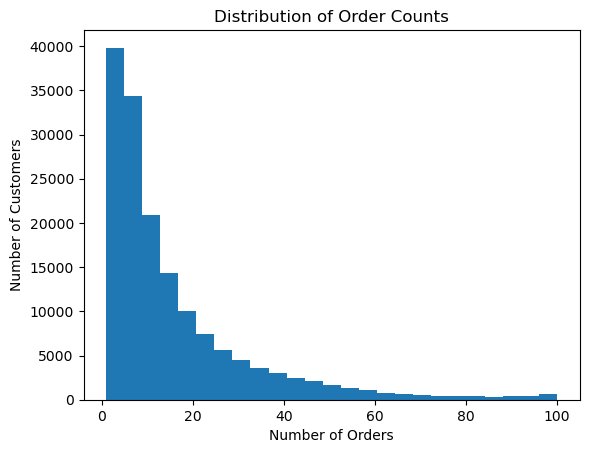

In [135]:
# Get the number of orders placed by each customer
# Group by user_id and get ['order_number'].max() for each user_id
order_cnts_df = orders_df.groupby(
    'user_id')['order_number'].max().reset_index()

# Display the description of order counts
print(order_cnts_df['order_number'].describe())


# Plot the distribution of order counts
fig_order_cnts = order_cnts_df['order_number'].plot(kind='hist', bins=25, title='Distribution of Order Counts',
                                                    xlabel='Number of Orders', ylabel='Number of Customers')
plt.show()

**Answer:**  
The distribution of the number of orders per customer is a right-skewed distribution where the bulk of customers place a relatively small number of orders, and a smaller number of customers place a large number of orders. The average number of orders is around 15.6, but there's a wide range from 1 to 100 orders per customer. The median is at 9, indicating that half of the customers place fewer than 9 orders.

## Question B3:  
What are the top 20 popular products?

In [136]:
# Need each product ID and the number of times it was ordered
# Group by product_id and get the count of each group
prod_order_cnts = order_products_df.groupby('product_id')['order_id'].count(
).reset_index().rename(columns={'order_id': 'order_cnt'})

# Sort the series in descending order
prod_order_cnts = prod_order_cnts.sort_values(
    by='order_cnt', ascending=False).reset_index(drop=True)

# Left join prod_order_cnts with products_df on product_id to get the product_name
prod_order_cnts = prod_order_cnts.merge(
    products_df[['product_id', 'product_name']], on='product_id', how='left')

# Define top 20 products as its own dataframe
top_20_prods_df = prod_order_cnts.head(20)
display(top_20_prods_df)

# Get the percentage of product names that contain the word 'organic'
organic_prod_cnt = top_20_prods_df['product_name'].str.contains(
    'organic').sum() / len(top_20_prods_df)
print(f'{organic_prod_cnt:.0%} of the top 20 products contain the word "organic"')

,product_id,order_cnt,product_name
0,24852,66050,banana
1,13176,53297,bag of organic bananas
2,21137,37039,organic strawberries
3,21903,33971,organic baby spinach
4,47209,29773,organic hass avocado
5,47766,24689,organic avocado
6,47626,21495,large lemon
7,16797,20018,strawberries
8,26209,19690,limes
9,27845,19600,organic whole milk


75% of the top 20 products contain the word "organic"


**Answer:**  
The above displays the 20 most popular products in descending order. Notable they are all produce items, with 75% being organic produce.

## Question C1:  
How many items do people typically buy in one order? What does the distribution look like?

In [137]:
# I need items per order. I can group by order_id and count the product IDs in each group
products_per_order_df = order_products_df.groupby('order_id')['product_id'].count(
).reset_index().rename(columns={'product_id': 'products_per_order'})

# Print the description of products per order, include mode
# Get the mode for products per order
mode = products_per_order_df['products_per_order'].mode()[0]
print(f'mode            {mode}')
print(products_per_order_df['products_per_order'].describe())

mode            5
count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: products_per_order, dtype: float64


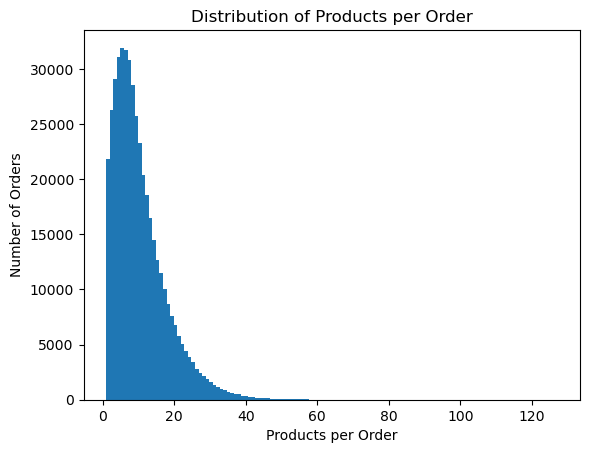

In [138]:
# Plot the distribution of products per order
fig_products_per_order = products_per_order_df['products_per_order'].plot(
    kind='hist', bins=127, title='Distribution of Products per Order', xlabel='Products per Order', ylabel='Number of Orders')

plt.show()

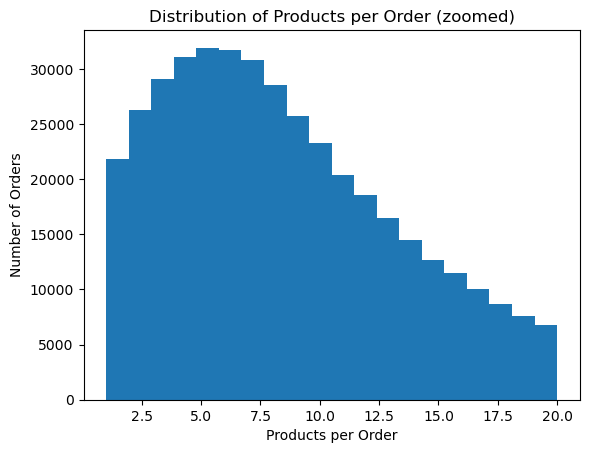

In [139]:
# Display same figure 'zoomed in' to show the distribution of products per order for orders with 20 or fewer products
fig_products_per_order_zoom = products_per_order_df[products_per_order_df['products_per_order'] <= 20]['products_per_order'].plot(
    kind='hist', bins=20, title='Distribution of Products per Order (zoomed)', xlabel='Products per Order', ylabel='Number of Orders')

plt.show()

**Answer:**  
Typically, people buy 5 items in a single order, as that's the most common order size (mode). The distribution of products per order is right-skewed, with the median at 8 items, slightly higher than the mode. The average (mean) number of items is about 10, with a standard deviation of 7.5, indicating variability in the number of products per order. The data ranges from 1 to 127 items per order, but most orders (75%) include 14 items or fewer, reinforcing that larger orders are less common. The graph supports this, showing a steep drop-off as the number of items per order increases.

## Question C2:  
What are the top 20 items that are reordered most frequently?

In [140]:
# Group order_products_df by product_id and sum the reordered column to get the total number of times each product was reordered

prod_reorder_cnts_df = order_products_df.groupby('product_id')['reordered'].sum(
).reset_index().rename(columns={'reordered': 'reorder_cnt'})

# Sort the dataframe by reorder count in descending order
prod_reorder_cnts_df = prod_reorder_cnts_df.sort_values(
    by='reorder_cnt', ascending=False).reset_index(drop=True)

# Create df of just top 20 reorder products
top_20_reorder_prods_df = prod_reorder_cnts_df.head(20)

# Left join top_20_reorder_prods_df with products_df on product_id to get the product_name
top_20_reorder_prods_df = top_20_reorder_prods_df.merge(
    products_df[['product_id', 'product_name']], on='product_id', how='left')

# Check for duplicate product names
if top_20_reorder_prods_df['product_name'].duplicated().sum() != 0:
    raise ValueError(
        'There are duplicate product names in the top_20_reorder_prods_df dataframe')

# Display the top 20 reorder products to answer the question
display(top_20_reorder_prods_df)

# Get percentage of product names that contain the word 'organic'
top_20_reorder_percent_organic = (
    top_20_reorder_prods_df['product_name'].str.contains('organic').sum()) / 20
print(f'{top_20_reorder_percent_organic:.0%} of the top 20 reorder products contain the word "organic"')

# Create a list of product IDs that are in the top 20 reorder products and the top 20 products
top_20_reorder_prod_ids = top_20_reorder_prods_df['product_id'].tolist()
top_20_prod_ids = top_20_prods_df['product_id'].tolist()
# Get the product IDs from top_20_reorder_prod_ids that are not in top_20_prod_ids
reorder_prods_not_in_top_20 = [
    prod_id for prod_id in top_20_reorder_prod_ids if prod_id not in top_20_prod_ids]
# Get the product IDs from top_20_prod_ids that are not in top_20_reorder_prod_ids
top_20_prods_not_in_reorder = [
    prod_id for prod_id in top_20_prod_ids if prod_id not in top_20_reorder_prod_ids]

# Change the lists to just the product names
reorder_prods_not_in_top_20 = [products_df[products_df['product_id'] ==
                                           prod_id].iloc[0]['product_name'] for prod_id in reorder_prods_not_in_top_20]
top_20_prods_not_in_reorder = [products_df[products_df['product_id'] ==
                                           prod_id].iloc[0]['product_name'] for prod_id in top_20_prods_not_in_reorder]


print(
    f'All products in the top 20 reorder products are also in the top 20 products except for {reorder_prods_not_in_top_20} has been swapped for {top_20_prods_not_in_reorder}.')

,product_id,reorder_cnt,product_name
0,24852,55763,banana
1,13176,44450,bag of organic bananas
2,21137,28639,organic strawberries
3,21903,26233,organic baby spinach
4,47209,23629,organic hass avocado
5,47766,18743,organic avocado
6,27845,16251,organic whole milk
7,47626,15044,large lemon
8,27966,14748,organic raspberries
9,16797,13945,strawberries


75% of the top 20 reorder products contain the word "organic"
All products in the top 20 reorder products are also in the top 20 products except for ['organic half & half'] has been swapped for ['organic grape tomatoes'].


**Answer:**  
The top 20 most reordered items are above in descending order. Much like the top 20 most ordered items, 75% of the top 20 reorder products contain the word "organic".  
All products in the top 20 reorder products are also in the top 20 products except for Organic Half & Half has been swapped for Organic Grape Tomatoes.

## Question C3:  
For each product, what proportion of its orders are reorders?

In [141]:
# Need a df with each product ID, the number of times it was ordered, and the number of times it was reordered.

# Left join prod_order_cnts with prod_reorder_cnts_df on product_id
prod_order_cnts = prod_order_cnts.merge(
    prod_reorder_cnts_df, on='product_id', how='left')

# Add column 'reorder_rate' to prod_order_cnts
prod_order_cnts['reorder_rate'] = prod_order_cnts['reorder_cnt'] / \
    prod_order_cnts['order_cnt']

# Sort in descending order by reorder rate
prod_order_cnts = prod_order_cnts.sort_values(
    by='reorder_rate', ascending=False).reset_index(drop=True)

# Convert reorder rate to percentage and store as string
prod_order_cnts['reorder_rate'] = (prod_order_cnts['reorder_rate'] * 100).round(
    2).astype(str) + '%'

# Reorganize the column names
prod_order_cnts = prod_order_cnts[['product_id', 'product_name', 'order_cnt',
                                   'reorder_cnt', 'reorder_rate']]
display(prod_order_cnts)

,product_id,product_name,order_cnt,reorder_cnt,reorder_rate
0,49662,bacon cheddar pretzel pieces,1,1,100.0%
1,42991,kat kit disposable tray,2,2,100.0%
2,18737,mini soft tortilla taco boats,1,1,100.0%
3,32600,pure rooibos red tea,2,2,100.0%
4,17844,medium smoked oysters,2,2,100.0%
...,...,...,...,...,...
45568,11035,sugar free strawberry-banana low calorie gelat...,2,0,0.0%
45569,8028,sf pasta broc white cheese sauce,2,0,0.0%
45570,24688,healthy white clean mint vibrant anticavity mo...,5,0,0.0%
45571,17411,multi-v goodness fruit juice smoothie,5,0,0.0%


**Answer:**  
The DataFrame prod_order_cnts contains the reorder rate for each product as well as the order count and reorder count. This DF can be saved to a new CSV if necessary. 

## Question C4:
For each customer, what proportion of their products ordered are reorders?

In [142]:
# Group order_products_df_alt by order_id, get max value of add_to_cart_order, and sum the reordered column to get the total number of products per order and the total number of products reordered per order
prods_per_order_df = order_products_df.groupby('order_id').agg({'product_id': 'count', 'reordered': 'sum'}).reset_index(
).rename(columns={'product_id': 'products_per_order', 'reordered': 'reordered_cnt'})


# Left join prods_per_order_df with orders_df on order_id to get the user_id
prods_per_order_df = prods_per_order_df.merge(
    orders_df[['order_id', 'user_id']], on='order_id', how='left')

# Group prods_per_order_df by user_id and get the sum of products_per_order and reordered_cnt for each user_id
prods_per_user_df = prods_per_order_df[['user_id', 'products_per_order', 'reordered_cnt']].groupby('user_id').sum(
).reset_index().rename(columns={'products_per_order': 'total_products', 'reordered_cnt': 'total_reordered_products'})

# Add column 'reorder_rate' to prods_per_user_df
prods_per_user_df['reorder_rate'] = prods_per_user_df['total_reordered_products'] / \
    prods_per_user_df['total_products']

# Sort in descending order by reorder rate
prods_per_user_df = prods_per_user_df.sort_values(
    by='reorder_rate', ascending=False).reset_index(drop=True)

# Convert reorder rate to percentage and store as string
prods_per_user_df['reorder_rate'] = (prods_per_user_df['reorder_rate'] * 100).round(
    2).astype(str) + '%'

display(prods_per_user_df)

,user_id,total_products,total_reordered_products,reorder_rate
0,137587,3,3,100.0%
1,173474,2,2,100.0%
2,13918,4,4,100.0%
3,62300,7,7,100.0%
4,62307,1,1,100.0%
...,...,...,...,...
149621,190953,9,0,0.0%
149622,119371,10,0,0.0%
149623,63173,4,0,0.0%
149624,63163,3,0,0.0%


**Answer:**  
The DataFrame prods_per_user_df contains the reorder rate for each customer as well as the order count and reorder count. This DF can be saved to a new CSV if necessary. 

## Question C5:  
What are the top 20 items that people put in their carts first? 

In [143]:
# Filter order_products_df to only include rows where add_to_cart_order is 1
filtered_df = order_products_df[order_products_df['add_to_cart_order'] == 1]

# Group by product_id and sum add to cart order to get the total number of times each product was the first product in an order
first_prods_df = filtered_df.groupby('product_id')['add_to_cart_order'].sum().to_frame().rename(columns={
    'add_to_cart_order': 'first_in_order_cnt'}).sort_values(by='first_in_order_cnt', ascending=False).reset_index()

# Left join first_prods_df with products_df on product_id to get the product_name
first_prods_df = first_prods_df.merge(
    products_df[['product_id', 'product_name']], on='product_id', how='left')

# Reorganize the columns in first_prods_df
first_prods_df = first_prods_df[[
    'product_id', 'product_name', 'first_in_order_cnt']]

display(first_prods_df.head(20))

,product_id,product_name,first_in_order_cnt
0,24852,banana,15562
1,13176,bag of organic bananas,11026
2,27845,organic whole milk,4363
3,21137,organic strawberries,3946
4,47209,organic hass avocado,3390
5,21903,organic baby spinach,3336
6,47766,organic avocado,3044
7,19660,spring water,2336
8,16797,strawberries,2308
9,27966,organic raspberries,2024


**Answer:**  
The top 20 items that people put in their cart first is displayed above in descending order.

# Conclusions

The data has been cleaned and analyzed to provide insight into the shopping habits of Instacart customers.  

The busiest time of day for grocery shopping is 10 AM, and the busiest day of the week is Sunday.  

Customers typically order once every 7 days, with the most common number of days since the prior order being 7.  

There is little difference in the distribution of orders by hour between Wednesdays and Saturdays, with the only notable difference being a slight dip in orders on Wednesdays between 11 AM and 3 PM.

The distribution of the number of orders per customer is right-skewed, with the average customer placing around 15.6 orders. 

The most popular products are all produce items, with the most popular product being bananas.  

The most common number of items per order is 5, with the distribution being right-skewed and the median at 8 items.  

The top 20 most reordered items are also produce items, 75% of which contain the word "organic". The most reordered item is bananas.  

The reorder rate for each product is stored in the DataFrame prod_order_cnts.  

The reorder rate for each customer is stored in the DataFrame prods_per_user_df.  

The count of times a product was the first in a cart is stored in the DataFrame first_prods_df, and is sorted in descending order.  